<a href="https://colab.research.google.com/github/accarter/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module2-make-features/LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

In [0]:
import pandas as pd

In [0]:
# Lets take a look at the Ames Iowa Housing Dataset:
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'

In [0]:
iowa = pd.read_csv(source_url)

In [39]:
iowa.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
330,331,90,RL,NaN,10624,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,4,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkFace,84.0,TA,TA,CBlock,TA,TA,No,GLQ,40,Rec,264,1424,1728,GasA,...,Y,SBrkr,1728,0,0,1728,0,1,2,0,6,2,TA,10,Typ,0,NaN,Detchd,2002.0,Unf,1,352,TA,TA,Y,155,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,119000
886,887,90,RL,70.0,8393,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,5,1959,2005,Gable,CompShg,MetalSd,MetalSd,BrkFace,122.0,TA,TA,CBlock,TA,TA,No,LwQ,528,Unf,0,1098,1626,GasA,...,Y,SBrkr,1712,0,0,1712,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,2005.0,Fin,2,588,TA,TA,Y,272,54,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Family,145000
491,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,...,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal,133000
256,257,60,FV,64.0,8791,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Rec,503,Unf,0,361,864,GasA,...,Y,SBrkr,864,864,0,1728,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2003.0,RFn,2,673,TA,TA,Y,216,56,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,207500
120,121,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,SLvl,6,5,1969,1969,Flat,Metal,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,938,Unf,0,0,938,GasA,...,Y,SBrkr,988,0,0,988,1,0,1,0,1,1,TA,4,Typ,2,TA,Attchd,1969.0,Unf,2,540,TA,TA,Y,0,130,0,130,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000


In [40]:
iowa.shape

(1460, 81)

In [41]:
iowa.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [42]:
iowa['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

In [43]:
iowa[['YearBuilt', 'MSSubClass']].describe()

,YearBuilt,MSSubClass
count,1460.000000,1460.000000
mean,1971.267808,56.897260
std,30.202904,42.300571
min,1872.000000,20.000000
25%,1954.000000,20.000000
50%,1973.000000,50.000000
75%,2000.000000,70.000000
max,2010.000000,190.000000


In [44]:
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [45]:
pd.set_option('display.max_rows', 100)
iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [46]:
iowa['BedroomAbvGr'].dtype

dtype('int64')

In [47]:
iowa.Fireplaces.sample()

237    0
Name: Fireplaces, dtype: int64

In [48]:
iowa['Fireplaces'].sample()

324    1
Name: Fireplaces, dtype: int64

In [49]:
iowa[['Fireplaces', 'BedroomAbvGr']].sample(4)

,Fireplaces,BedroomAbvGr
188,2,2
684,0,4
1387,1,5
1100,0,1


In [50]:
iowa['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [51]:
iowa['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [52]:
iowa['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [0]:
import numpy as np

In [54]:
np.nan

nan

In [55]:
type(np.nan)

float

In [56]:
iowa['LotFrontage'].isnull().sum()

259

In [57]:
iowa.shape

(1460, 81)

In [0]:
iowa['LotFrontage'].dropna(inplace=True)

In [59]:
iowa.shape

(1460, 81)

In [65]:
small = iowa[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
662,1392,1392,0,110000
386,658,658,526,81000
1008,1710,1710,0,240000


In [67]:
small['TotalSF'] = small['TotalBsmtSF'] + small['1stFlrSF'] + small['2ndFlrSF']
small.head()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706
3,756,961,756,140000,2473
4,1145,1145,1053,250000,3343


In [70]:
small['PricePerSF'] = small['SalePrice'] / small['TotalSF']
small.sample(5)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
327,1383,1383,0,145250,2766,52.512654
572,846,846,846,224500,2538,88.455477
1229,1075,1507,0,127000,2582,49.186677
1387,714,1664,862,136000,3240,41.975309
1277,1680,1724,0,197900,3404,58.137485


In [71]:
iowa.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [73]:
iowa[['LotShape', 'Alley', 'Street', 'SaleCondition']].sample(5)

,LotShape,Alley,Street,SaleCondition
1429,IR1,NaN,Pave,Normal
226,IR1,NaN,Pave,Abnorml
749,Reg,NaN,Pave,Normal
579,Reg,Grvl,Pave,Normal
561,Reg,NaN,Pave,Normal


In [74]:
iowa['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [76]:
iowa['NormalCondition'] = np.where(iowa['SaleCondition'] == 'Normal', "yes", "no")
iowa['NormalCondition'].value_counts()

yes    1198
no      262
Name: NormalCondition, dtype: int64

In [77]:
iowa['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [79]:
iowa['LotShape3'] = iowa['LotShape'].map({
    'Reg': 'Regular',
    'IR1': 'Irregular',
    'IR2': 'Other',
    'IR3': 'Other'
})

iowa['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [80]:
iowa['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [82]:
iowa['top_neighbors'] = 'All Others'
iowa[['top_neighbors', 'Neighborhood']].head()

,top_neighbors,Neighborhood
0,All Others,CollgCr
1,All Others,Veenker
2,All Others,CollgCr
3,All Others,Crawfor
4,All Others,NoRidge


In [86]:
iowa.loc[iowa['Neighborhood'] == 'NAmes', 'top_neighbors'] = 'North Ames'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
643,All Others,NWAmes
1345,All Others,OldTown
1046,All Others,StoneBr
835,All Others,Sawyer
577,All Others,Sawyer
1032,All Others,NoRidge
1304,All Others,Edwards
242,All Others,OldTown
182,All Others,Edwards
1454,All Others,Somerst


In [87]:
iowa.loc[iowa['Neighborhood'] == 'CollgCr', 'top_neighbors'] = 'College Circle'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
1262,All Others,ClearCr
657,All Others,Crawfor
304,All Others,OldTown
165,All Others,Edwards
1015,All Others,NWAmes
66,North Ames,NAmes
1013,All Others,OldTown
1095,College Circle,CollgCr
804,North Ames,NAmes
1255,All Others,BrkSide


In [88]:
iowa['top_neighbors'].value_counts()

All Others        1085
North Ames         225
College Circle     150
Name: top_neighbors, dtype: int64

In [93]:
iowa.loc[iowa['Neighborhood'] == 'Gilbert', 'top_neighbors'] = 'Favorite Neighborhood'
iowa.loc[iowa['Neighborhood'] == 'Somerst', 'top_neighbors'] = 'Favorite Neighborhood'
iowa[['top_neighbors', 'Neighborhood']].sample(10)

,top_neighbors,Neighborhood
122,North Ames,NAmes
1300,Favorite Neighborhood,Gilbert
1305,All Others,NridgHt
31,All Others,Sawyer
1108,Favorite Neighborhood,Gilbert
199,All Others,NridgHt
338,All Others,NWAmes
829,Favorite Neighborhood,Somerst
1073,All Others,Edwards
328,All Others,BrkSide


In [94]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,294,23,603
College Circle,53,11,86
Favorite Neighborhood,71,15,79
North Ames,66,2,157


In [96]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,294,23,603,920
College Circle,53,11,86,150
Favorite Neighborhood,71,15,79,165
North Ames,66,2,157,225
All,484,51,925,1460


In [97]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index')

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,0.319565,0.025000,0.655435
College Circle,0.353333,0.073333,0.573333
Favorite Neighborhood,0.430303,0.090909,0.478788
North Ames,0.293333,0.008889,0.697778


In [98]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='index', margins=True)

LotShape3,Irregular,Other,Regular
top_neighbors,,,
All Others,0.319565,0.025000,0.655435
College Circle,0.353333,0.073333,0.573333
Favorite Neighborhood,0.430303,0.090909,0.478788
North Ames,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


In [100]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'], normalize='columns', margins=True)

LotShape3,Irregular,Other,Regular,All
top_neighbors,,,,
All Others,0.607438,0.450980,0.651892,0.630137
College Circle,0.109504,0.215686,0.092973,0.102740
Favorite Neighborhood,0.146694,0.294118,0.085405,0.113014
North Ames,0.136364,0.039216,0.169730,0.154110


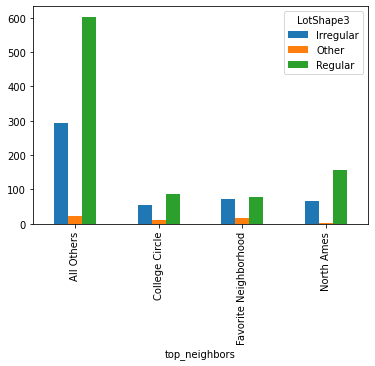

In [102]:
myresults = pd.crosstab(iowa['top_neighbors'], iowa['LotShape3'])
myresults.plot(kind='bar');

In [104]:
pd.crosstab(iowa['OverallQual'], iowa['top_neighbors'])

top_neighbors,All Others,College Circle,Favorite Neighborhood,North Ames
OverallQual,,,,
1,2,0,0,0
2,3,0,0,0
3,17,0,0,3
4,94,1,1,20
5,253,28,3,113
6,232,24,44,74
7,159,71,77,12
8,108,23,34,3
9,35,3,5,0


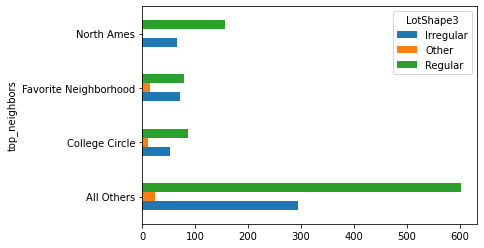

In [105]:
pd.crosstab(iowa['top_neighbors'], iowa['LotShape3']).plot(kind='barh');

In [106]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-05-08 22:01:38--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 54.201.144.36, 52.89.126.95, 44.225.46.60
Connecting to resources.lendingclub.com (resources.lendingclub.com)|54.201.144.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [          <=>       ]  22.05M  1.95MB/s    in 12s     

2020-05-08 22:01:51 (1.85 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [23121687]



In [107]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [108]:
loans = pd.read_csv('LoanStats_2018Q4.csv')
loans.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,126,127,131,132,134,135,136,141,142,143) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title             emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN NaN       10000     10000       10000            60 months  16.14%  243.93      C     C4        Sale Consultant       2 years    RENT           90000      Not Verified        Dec-2018 Fully Paid  n          NaN NaN  debt_consolidation Debt consolidation      079xx    NJ         8.8   0           Mar-1991         1              NaN                    43                     11       1       10582     58.5%      32        w                   0.00      0.00          10661.0577272374 10661.06        10000.00        661.06        0.0                0.0        0.0                     May-2019     9698.79         NaN          Dec-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              0            15470       1           1           0           1           18                 4888         65      1           3           2969       60       18100            2      0           2            4                    1719        4906           67.3    0                        0           133                333                  2                     2              1        2                    NaN                      1                     NaN                            0                     4              6               5           15        6         8             23            6                   11       0                0            0                  1                  100            80   

In [109]:
loans.tail()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
NaN                                              NaN 5000  5000  5000   36 months  13.56% 169.83 C   C1  Payoff Clerk         10+ years MORTGAGE 35360.0 Not Verified    Oct-2018 Current n   NaN NaN debt_consolidation Debt consolidation      381xx TN  11.3  1   Jun-2006 0   21.0 NaN 9   0   2597 27.3% 15  f   2751.79 2751.79 3053.17 3053.17 2248.21 804.96  0.0 0.0 0.0 Apr-2020 169.83 May-2020 Apr-2020 0   NaN  1   Individual NaN NaN NaN 0   1413 69785 0   2   0   1   16.0 2379    40.0  3   4   1826 32.0 9500  0   0   1   5   8723   1174.0  60.9 0   0   147.0 85  9   9   2   10.0  21.0 9.0 21.0 0   1   3   2   2   6   6   7   3   9   0.0 0   0   3   92.9 50.0 0   0   93908   4976  3000  6028.0  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                     10000 10000 9750   36 months  11.06% 327.68 B   B3  NaN                  NaN       RENT     44400.0 Source Verified Oct-2018 Current n   NaN NaN credit_card        Credit card refinancing 980xx WA  11.78 0   Oct-2008 2   40.0 NaN 15  0   6269 13.1% 25  f   5411.74 5276.45 5882.88 5735.81 4588.26 1294.62 0.0 0.0 0.0 Apr-2020 327.68 May-2020 Apr-2020 0   53.0 1   Individual NaN NaN NaN 0   520  16440 3   1   1   1   2.0  10171   100.0 2   5   404  28.0 47700 0   3   5   6   1265.0 20037.0 2.3  0   0   61.0  119 1   1   0   1.0   NaN  1.0 40.0 1   2   4   6   8   3   14  22  4   15  0.0 0   0   3   92.0 0.0  0   0   57871.0 16440 20500 10171.0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
                                                                 10000  36 months  16.91% 356.08 C   C5  Key Accounts Manager 2 years   RENT     80000.0 Not Verified    Oct-2018 Current n   NaN NaN other              Other                   021xx MA  17.72 1   Sep-2006 0   14.0 NaN 17  0   1942 30.8% 31  w   5626.39 5626.39 6400.05 6400.05 4373.61 2026.44 0.0 0.0 0.0 Apr-2020 356.08 May-2020 Apr-2020 0   25.0 1   Individual NaN NaN NaN 0   0    59194 0   15  1   1   12.0 57252.0 85.0  0   0   1942 80.0 6300  0   5   0   1   3482   2058.0  48.5 0   0   144.0 142 40  12  0   131.0 30.0 NaN 30.0 3   1   1   1   5   22  2   9   1   17  0.0 0   0   1   74.2 0.0  0   0   73669   59194 4000  67369   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN N   NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 1: 2050909275 NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN NaN  NaN NaN NaN NaN  NaN   NaN NaN NaN     NaN     NaN     NaN     NaN     NaN     NaN NaN NaN NaN      NaN    NaN      NaN      NaN NaN  NaN NaN        NaN NaN NaN NaN NaN  NaN   NaN NaN NaN NaN NaN  NaN     NaN   NaN NaN NaN  NaN  NaN   NaN NaN NaN NaN NaN    NaN     NaN  NaN NaN NaN   NaN NaN NaN NaN NaN   NaN  NaN NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN NaN NaN     NaN   NaN   NaN     NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN                                                NaN                              
Total amount funded in policy code 2: 820109297  NaN NaN   NaN   NaN   NaN        NaN     NaN    NaN NaN NaN                  NaN       NaN      NaN     NaN             NaN      NaN     NaN NaN NaN NaN                NaN                     NaN   NaN NaN   NaN NaN      NaN N

In [0]:
loans = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')

In [111]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
pd.set_option('display.max_rows', 144)
loans.isnull().sum()

id                                            128412
member_id                                     128412
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      20947
emp_length                                     11704
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                         0
url                                           

In [116]:
loans.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
settlement_percentage                         127661
settlement_term                               127661
settlement_date                               127661
debt_settlement_flag_date                     127661
settlement_status                             127661
settlement_amount                             127661
sec_app_mths_since_last_major_derog           123258
hardship_loan_status                          117705
hardship_status                               117691
hardship_reason                               117691
hardship_dpd                                  117690
hardship_length                               117690
payment_plan_start_date                       117690
hardship_end_date                             117690
hardship_start_date                           

In [117]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
loans.drop('url', axis=1, inplace=True)

In [119]:
loans.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,5557.25,5557.25,6233.34,6233.34,4442.75,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,2751.79,2751.79,3053.17,3053.17,2248.21,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5411.74,5276.45,5882.88,5735.81,4588.26,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-2018,Current,n,NaN,other,Other,021xx,MA,17.72,1,Sep-2006,0,14.0,NaN,17,0,1942,30.8%,31,w,5626.39,5626.39,6400.05,6400.05,4373.61,...,0.0,0,0,73669,59194,4000,67369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
loans['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     12.98%
8     10.33%
9     23.40%
Name: int_rate, dtype: object

In [121]:
loans['int_rate'][3]

' 14.47%'

In [122]:
loans['int_rate'].dtype

dtype('O')

In [124]:
type(loans['int_rate'][3])

str

In [127]:
int_rate = ' 14.47%'
int_rate = int_rate.strip()
int_rate = int_rate.strip('%')
int_rate = float(int_rate)
int_rate

14.47

In [128]:
int_rate = ' 14.47%'
int_rate = float(int_rate.strip().strip('%'))
int_rate

14.47

In [129]:
type(int_rate)

float

In [0]:
def myFunc(cell_contents):
  if isinstance(cell_contents, str):
    return float(cell_contents.strip().strip('%'))
  return cell_contents

In [131]:
myFunc(int_rate)

14.47

In [132]:
new_list = []
for cell in loans['int_rate']:
  new_list.append(myFunc(cell))

new_list[:10]

[16.14, 11.8, 11.31, 14.47, 27.27, 16.14, 12.98, 12.98, 10.33, 23.4]

In [133]:
loans['int_rate'].head()

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
Name: int_rate, dtype: object

In [134]:
list(loans['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%']

In [0]:
loans['int_rate_clean'] = pd.Series(new_list)

In [137]:
loans[['int_rate_clean', 'int_rate']].sample(7)

,int_rate_clean,int_rate
115243,20.89,20.89%
28465,17.97,17.97%
41717,14.47,14.47%
112057,15.02,15.02%
115747,22.35,22.35%
109228,13.56,13.56%
32323,7.02,7.02%


In [138]:
loans['int_rate_clean'].dtype

dtype('float64')

In [0]:
loans['int_rate_clean2'] = loans['int_rate'].apply(myFunc)

In [141]:
loans[['int_rate', 'int_rate_clean', 'int_rate_clean2']].sample(7)

,int_rate,int_rate_clean,int_rate_clean2
37102,23.40%,23.40,23.40
71947,15.02%,15.02,15.02
119548,22.35%,22.35,22.35
29813,15.02%,15.02,15.02
71688,20.89%,20.89,20.89
53322,20.89%,20.89,20.89
45551,18.94%,18.94,18.94


In [142]:
loans['emp_title'].head(20)

0                          Sale Consultant
1                                Educator 
2                    Accounts Examiner III
3                                  teacher
4                           Claims Analyst
5                         Training Manager
6                             Tire builder
7               Program Support Assistant 
8                                   Driver
9                                   BANKER
10                        Business Analyst
11                                OPERATOR
12                        Shift Supervisor
13                                 Driver 
14    Assistant to the Treasurer (Payroll)
15               Reimbursement specialist 
16                       Financial Advisor
17                                Engineer
18                   Sales Account Manager
19                                     Cna
Name: emp_title, dtype: object

In [143]:
loans['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Truck Driver            387
Operations Manager      387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [144]:
loans['emp_title'].unique()

array(['Sale Consultant', 'Educator ', 'Accounts Examiner III', ...,
       'Oncology Medical Assistant', 'Tax Consultant', 'Payoff Clerk'],
      dtype=object)

In [145]:
len(loans['emp_title'].unique())

43893

In [146]:
loans['emp_title'].nunique()

43892

In [147]:
loans['emp_title'].isnull().sum()

20947

In [0]:
examples = ['owner', 'Supervisor', ' Project Manager', np.NaN]

In [149]:
type('Supervisor')

str

In [150]:
isinstance('Supervisor', str)

True

In [151]:
' supervisor'.title()

' Supervisor'

In [153]:
' supervisor'.title().strip()

'Supervisor'

In [0]:
def clean_title(jobtitle):
  if isinstance(jobtitle, str):
    return jobtitle.title().strip()
  return "Unknown"

In [155]:
clean_title(' supervisor')

'Supervisor'

In [156]:
clean_title(np.NaN)

'Unknown'

In [157]:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [158]:
[clean_title(title) for title in examples]

['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [0]:
loans['clean_title'] = loans['emp_title'].apply(clean_title)

In [161]:
loans[['emp_title', 'clean_title']].head()

,emp_title,clean_title
0,Sale Consultant,Sale Consultant
1,Educator,Educator
2,Accounts Examiner III,Accounts Examiner Iii
3,teacher,Teacher
4,Claims Analyst,Claims Analyst


In [162]:
loans[['emp_title', 'clean_title']].sample(20)

,emp_title,clean_title
17733,Field Engineer,Field Engineer
6242,NaN,Unknown
20004,"MD, Physician","Md, Physician"
22646,Sales representative,Sales Representative
9279,Corporate Trainer,Corporate Trainer
38074,Generalist - Technology Risk,Generalist - Technology Risk
67776,Procurement clerk,Procurement Clerk
27813,Electrician,Electrician
121434,Product Manager,Product Manager
70083,Dentist,Dentist


In [163]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,int_rate_clean,int_rate_clean2,clean_title
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,10000.00,...,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.14,16.14,Sale Consultant
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4066.26,4066.26,3222.810000,3222.81,2433.74,...,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,11.80,Educator
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,4500.00,...,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.31,11.31,Accounts Examiner Iii
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Charged Off,n,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,0.00,0.00,5848.050000,5848.05,3024.11,...,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,14.47,Teacher
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,25780.25,25780.25,13745.470000,13745.47,4219.75,...,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,27.27,27.27,Claims Analyst


In [164]:
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'int_rate_clean',
       'int_rate_clean2', 'clean_title'],
      dtype='object', length=146)

In [165]:
loans['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [167]:
mylist = []
for col in loans.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [168]:
[col for col in loans.columns if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [169]:
loans['issue_d'][0]

'Dec-2018'

In [171]:
type(loans['issue_d'][0])

str

In [0]:
loans['new_issue_d'] = pd.to_datetime(loans['issue_d'], infer_datetime_format=True)

In [173]:
loans[['issue_d', 'new_issue_d']].head()

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01


In [174]:
type(loans['new_issue_d'][3])

pandas._libs.tslibs.timestamps.Timestamp

In [175]:
loans['new_issue_d'].dtype

dtype('<M8[ns]')

In [176]:
print(loans['new_issue_d'].dtype)

datetime64[ns]


In [177]:
loans['new_issue_d'].head(1).values

array(['2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [179]:
loans['year'] = loans['new_issue_d'].dt.year
loans[['issue_d', 'new_issue_d', 'year']].head()

,issue_d,new_issue_d,year
0,Dec-2018,2018-12-01,2018
1,Dec-2018,2018-12-01,2018
2,Dec-2018,2018-12-01,2018
3,Dec-2018,2018-12-01,2018
4,Dec-2018,2018-12-01,2018


In [183]:
loans['month'] = loans['new_issue_d'].dt.month
loans[['issue_d', 'new_issue_d', 'year', 'month']].head()

,issue_d,new_issue_d,year,month
0,Dec-2018,2018-12-01,2018,12
1,Dec-2018,2018-12-01,2018,12
2,Dec-2018,2018-12-01,2018,12
3,Dec-2018,2018-12-01,2018,12
4,Dec-2018,2018-12-01,2018,12


In [184]:
loans['weekday'] = loans['new_issue_d'].dt.weekday
loans[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].head()

,issue_d,new_issue_d,year,month,weekday
0,Dec-2018,2018-12-01,2018,12,5
1,Dec-2018,2018-12-01,2018,12,5
2,Dec-2018,2018-12-01,2018,12,5
3,Dec-2018,2018-12-01,2018,12,5
4,Dec-2018,2018-12-01,2018,12,5


In [185]:
loans['new_pull'] = pd.to_datetime(loans['last_credit_pull_d'])
loans['month_pull'] = loans['new_pull'].dt.weekday
loans[['last_credit_pull_d', 'new_pull', 'month_pull']].head()

,last_credit_pull_d,new_pull,month_pull
0,Dec-2019,2019-12-01,6.0
1,Apr-2020,2020-04-01,2.0
2,Feb-2020,2020-02-01,5.0
3,Apr-2020,2020-04-01,2.0
4,Apr-2020,2020-04-01,2.0


In [187]:
loans['day_diff'] = loans['new_issue_d'] - loans['new_pull']
loans[['last_credit_pull_d', 'new_pull', 'day_diff']].head()

,last_credit_pull_d,new_pull,day_diff
0,Dec-2019,2019-12-01,-365 days
1,Apr-2020,2020-04-01,-487 days
2,Feb-2020,2020-02-01,-427 days
3,Apr-2020,2020-04-01,-487 days
4,Apr-2020,2020-04-01,-487 days


In [188]:
loans['day_diff'].value_counts().sort_index().tail()

-30 days     87
0 days      475
30 days      73
31 days      33
61 days       1
Name: day_diff, dtype: int64

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [189]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-08 22:55:20--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.64.195
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.64.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  79.5MB/s    in 2.5s    

2020-05-08 22:55:23 (79.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [190]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [191]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [0]:
pd.set_option('display.max_rows', 153)

In [196]:
loans['revol_util']

0         58.5%
1         41.6%
2         15.3%
3         45.7%
4         10.7%
          ...  
128407    43.6%
128408    37.1%
128409    27.3%
128410    13.1%
128411    30.8%
Name: revol_util, Length: 128412, dtype: object

In [212]:
loans['revol_util'].isnull().sum()

156

In [211]:
def cleanRU(s):
  if isinstance(s, str): return float(s.strip('%'))
  return s

loans['revol_util_clean'] = loans['revol_util'].apply(cleanRU)
loans[['revol_util', 'revol_util_clean']].sample(10)

,revol_util,revol_util_clean
57759,58.1%,58.1
69778,64.6%,64.6
62064,26%,26.0
57828,69.1%,69.1
78522,45.8%,45.8
117341,58.4%,58.4
34523,59%,59.0
24824,83.6%,83.6
117477,26.9%,26.9
69675,28.7%,28.7


In [233]:
top20 = loans['emp_title'].value_counts()[:20]

def consolidate(title):
  if title in top20: return title
  return 'Other'

loans['emp_title_top_20'] = loans['emp_title'].apply(consolidate)
loans[['emp_title', 'emp_title_top_20']].sample(10)

,emp_title,emp_title_top_20
16839,Warehouse operator,Other
9490,NaN,Other
95222,Cleaning Lady,Other
29668,Supervisor,Supervisor
120144,train operator,Other
122289,HR Account Receivable/Account Payable,Other
68092,Client Engagement Manager,Other
14263,Branch Manager,Other
99299,Sales Associate,Other
78790,Lead Legal Instruments Examiner,Other


In [0]:
orders = pd.read_csv('orders.csv')

In [320]:
orders.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [0]:
# get last 5 orders for each user
users = {}

user_ids = list(orders['user_id'])
order_ids = list(orders['order_id'])
for user_id, order_id in zip(user_ids, order_ids):
  if user_id not in users.keys():
    users[user_id] = [order_id]
  else:
    users[user_id].append(order_id)



In [0]:
recent5 = {}

for user_id, order_ids in users.items():
  recent5[user_id]  = order_ids[-5:]

In [0]:
def boughtRecently(order_id):
  total = 0
  for order_ids in recent5.values():
    if order_id in order_ids:
      total += 1
  return total

In [318]:
orders_sample = orders.loc[:150].copy()
orders_sample['total_buy_n5'] = orders_sample['order_id'].apply(boughtRecently)

orders_sample[['order_id', 'total_buy_n5']].sample(20)

,order_id,total_buy_n5
70,23391,1
22,3186735,1
119,1385564,0
79,280530,1
107,1378982,0
121,2127409,0
24,839880,1
75,600894,1
16,1199898,0
86,83395,1


In [321]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from subprocess import check_output

In [0]:
order_products_train_df = pd.read_csv("order_products__train.csv")
order_products_prior_df = pd.read_csv("order_products__prior.csv")
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

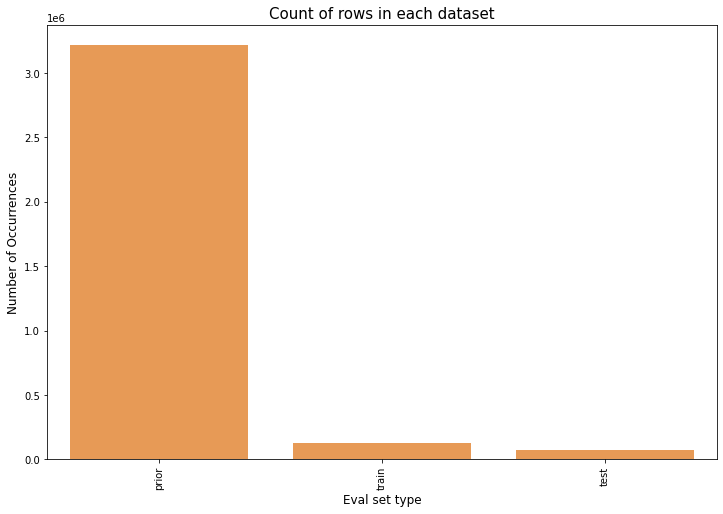

In [325]:
cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [326]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64